### Boston Housing Price

In [2]:
# The data set  contains information about the housing values in suburbs of Boston.
# This data set is available in  sklearn Python module which I will access using scikitlearn.
# This project aims to predict the housing price in Boston



In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [7]:
from sklearn.datasets import load_boston

In [8]:
bt = load_boston()

In [10]:
# Data is in the form of a dictionary
bt.keys()

dict_keys(['target', 'data', 'feature_names', 'DESCR'])

In [13]:
print(bt.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [14]:
bt.data.shape

(506, 13)

In [19]:
bt.target.shape

(506,)

In [20]:
print(bt.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [22]:
# Lets create the dataframe for the boston data
bt_df = pd.DataFrame(bt.data)

In [23]:
bt_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
# Change the column names with feature names
bt_df.columns = bt.feature_names

In [25]:
bt_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
# Since target is the y label(or the target house price),Lets add the target to boston dataframe
bt_df['PRICE'] = bt.target

In [27]:
bt_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
bt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [29]:
bt_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


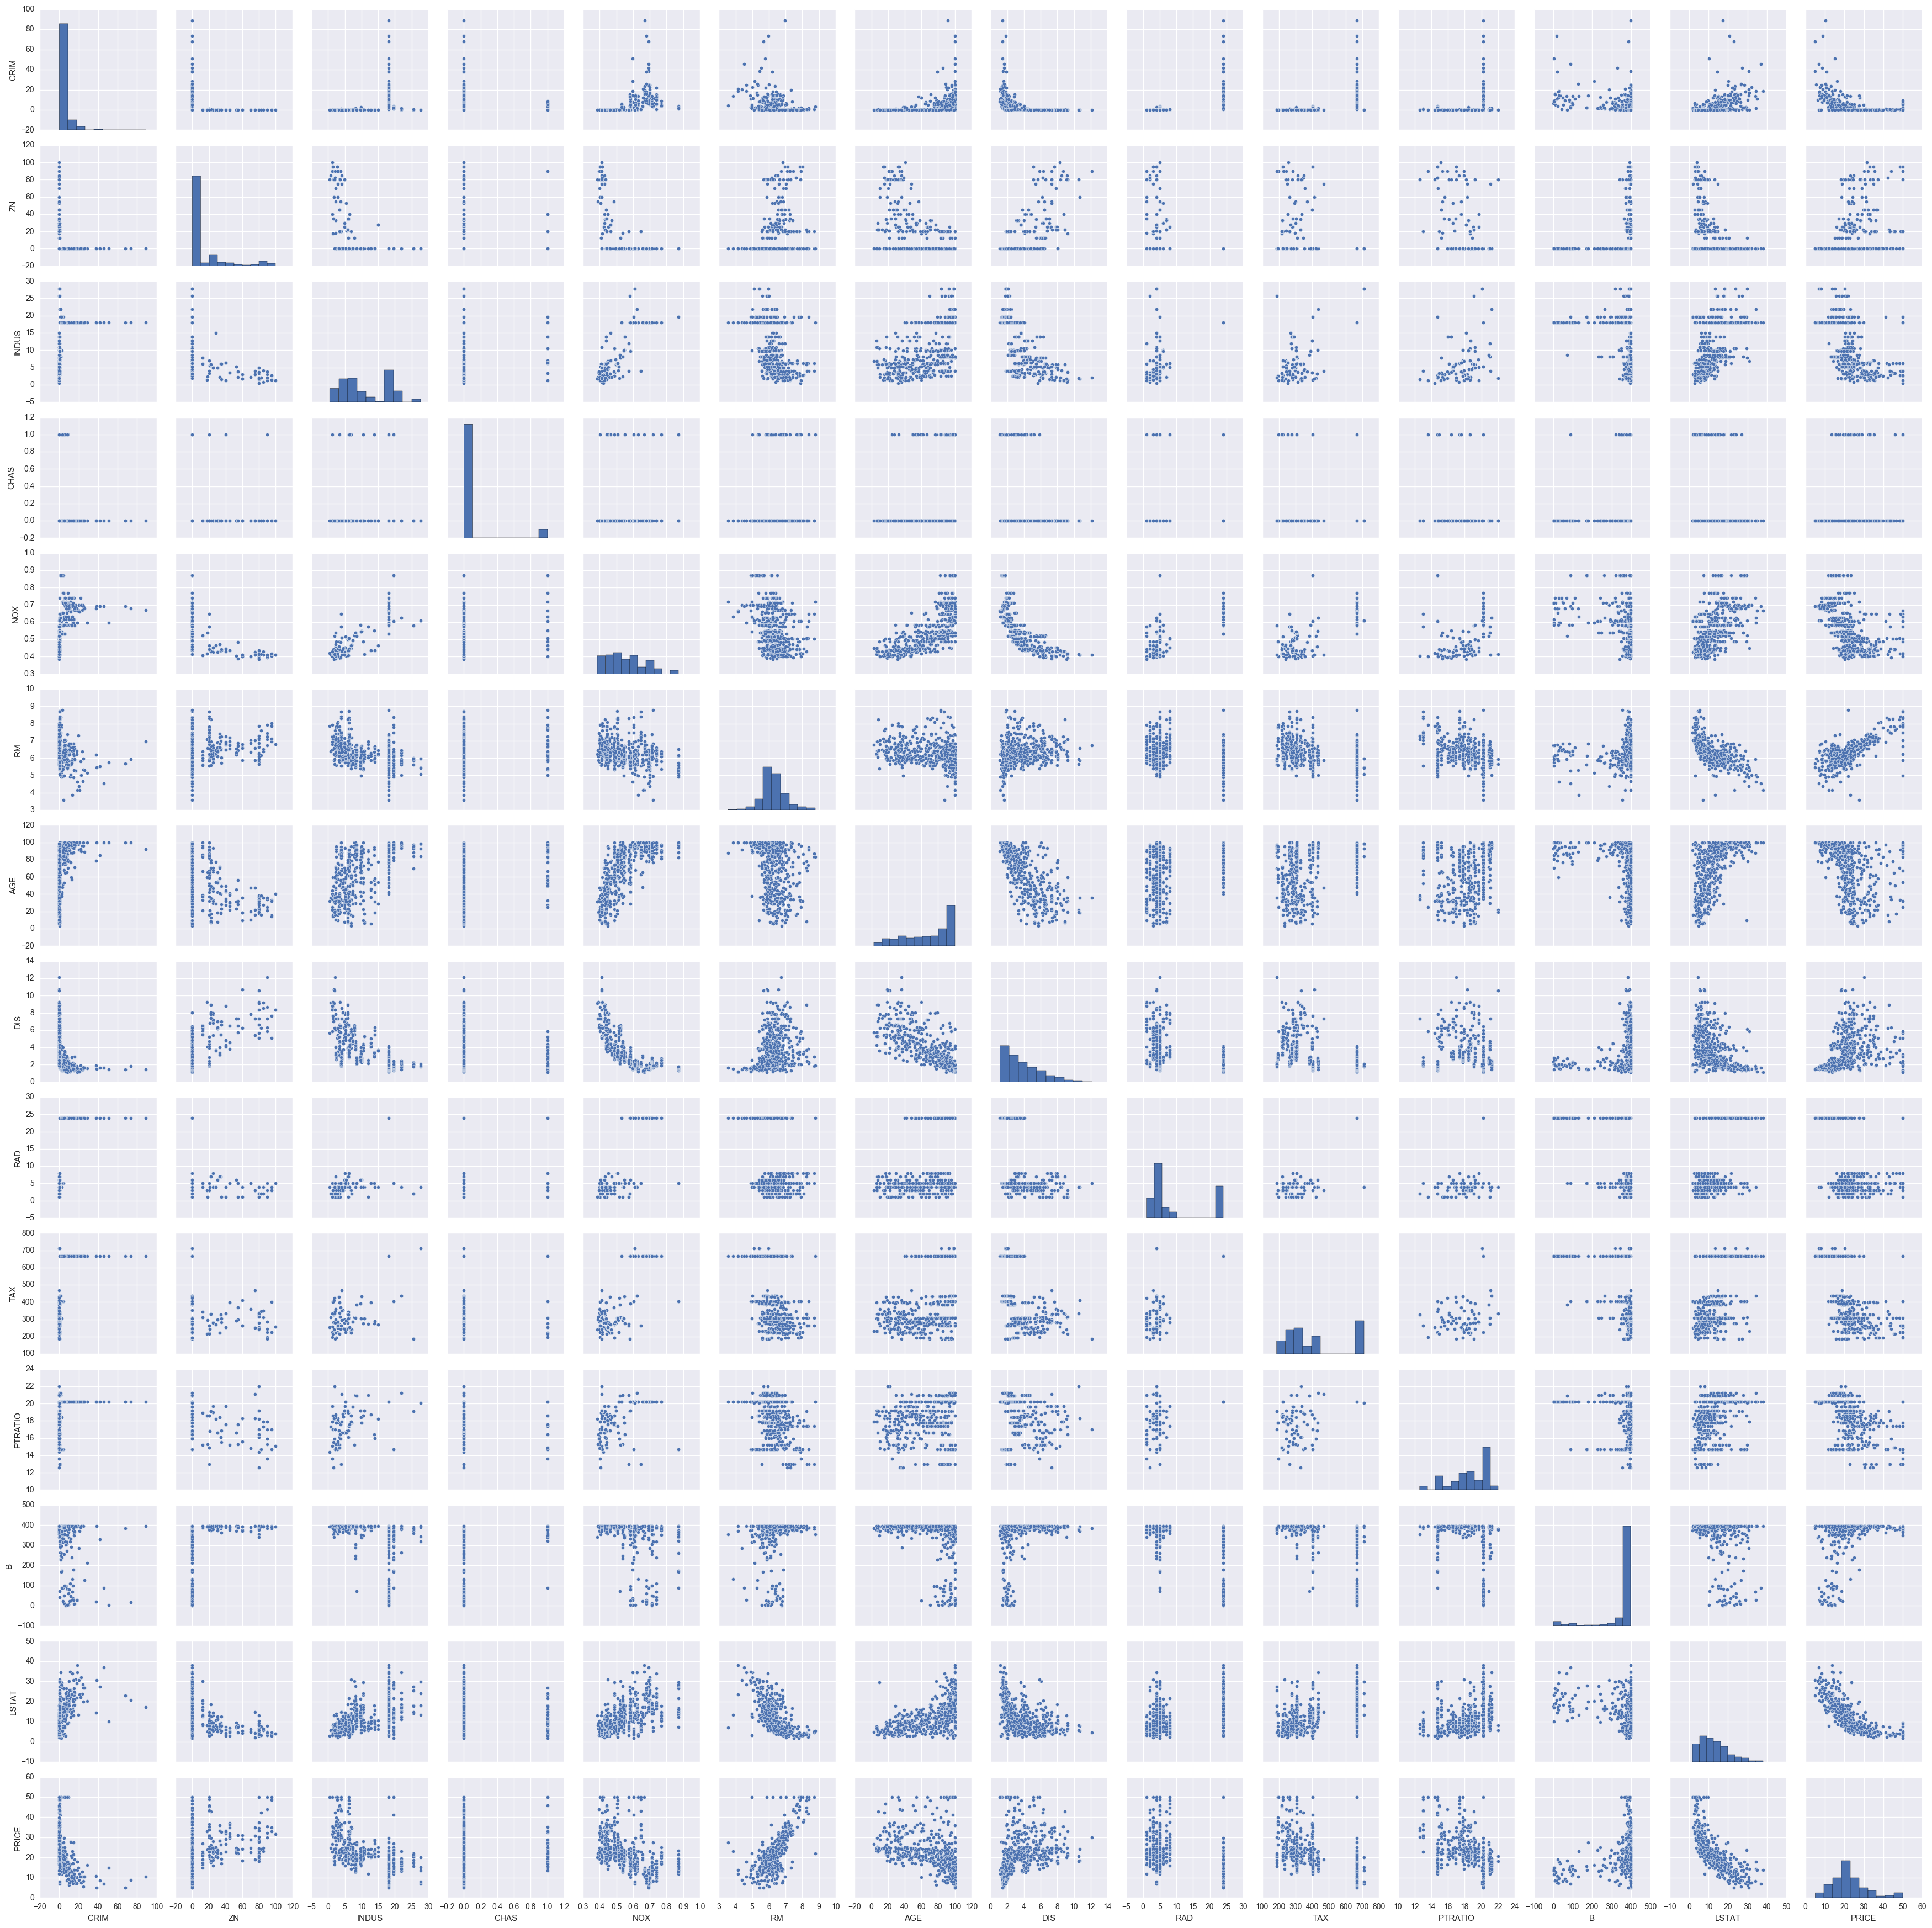

In [30]:
sns.pairplot(bt_df)

C:\Users\Sachin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


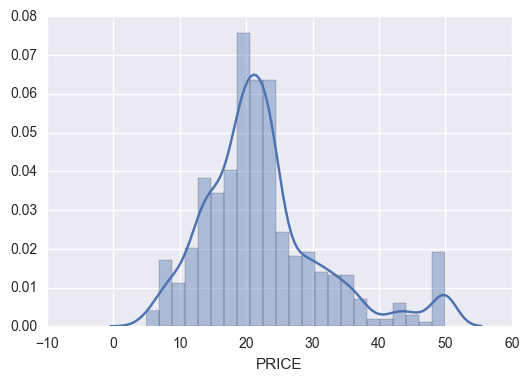

In [32]:
sns.distplot(bt_df['PRICE'])

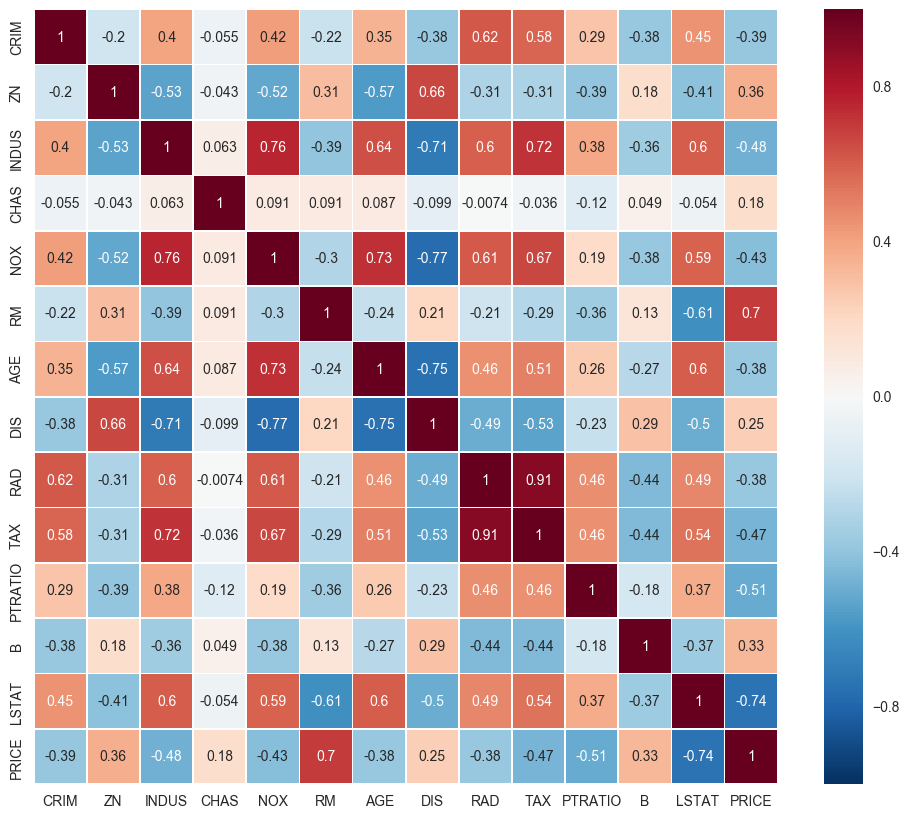

In [41]:
fig = plt.subplots(figsize=(12,10)) 
sns.heatmap(bt_df.corr(),annot=True,linewidths=.5)

In [43]:
bt_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [45]:
X = bt_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [46]:
y = bt_df['PRICE']

In [47]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [52]:
y_train.count()

303

In [53]:
y_test.count()

203

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lm = LinearRegression()

In [56]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
lm.intercept_

43.419454752840672

In [58]:
lm.coef_

array([ -1.57306712e-01,   5.13874004e-02,  -2.47630663e-02,
         3.05359074e+00,  -2.14257987e+01,   2.92973044e+00,
         2.30659208e-03,  -2.01648820e+00,   2.75215579e-01,
        -7.42843154e-03,  -7.47944872e-01,   1.00682991e-02,
        -7.32037648e-01])

In [59]:
cdf = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coeff'])

In [60]:
cdf

,Coeff
CRIM,-0.157307
ZN,0.051387
INDUS,-0.024763
CHAS,3.053591
NOX,-21.425799
RM,2.929730
AGE,0.002307
DIS,-2.016488
RAD,0.275216
TAX,-0.007428


In [61]:
predictions = lm.predict(X_test)

In [62]:
predictions

array([ 10.20907199,  21.09406477,  23.85592254,  35.30283027,
         8.34352637,  35.5739247 ,  26.3688804 ,  21.05486796,
         4.57362484,  19.53820485,  22.39717099,  41.61115697,
        30.46327596,  24.46191592,  33.52949658,  27.18973687,
        26.16402535,  22.05964517,  28.29805817,  18.86507556,
        32.95887982,  26.08723754,  22.26269099,  28.94788703,
        18.79650506,  19.48200426,  25.66232308,  36.51307383,
        17.3132703 ,  25.4268439 ,  28.82674938,  15.40562456,
        26.27802932,  15.99186811,  30.62310217,  26.52109362,
        17.50660188,  15.38568618,  24.38830722,  39.86514461,
        23.27131441,  17.31329721,  11.44773207,  16.74480832,
         8.76218268,  29.28089219,  24.21986494,   6.4821692 ,
        15.72457288,  18.43959225,  12.75365142,  20.13670748,
        33.73434475,  24.9114007 ,   5.04790208,  23.69879634,
        19.13430618,  21.35765197,  12.67134576,  36.61260239,
        34.00991279,  22.18678924,  27.57222068,  10.81

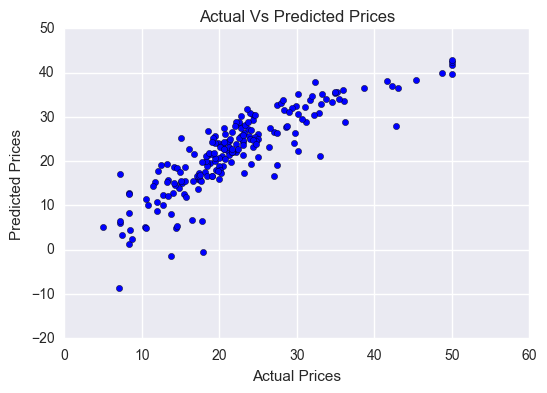

In [69]:
plt.scatter(y_test,predictions)
plt.title("Actual Vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

C:\Users\Sachin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


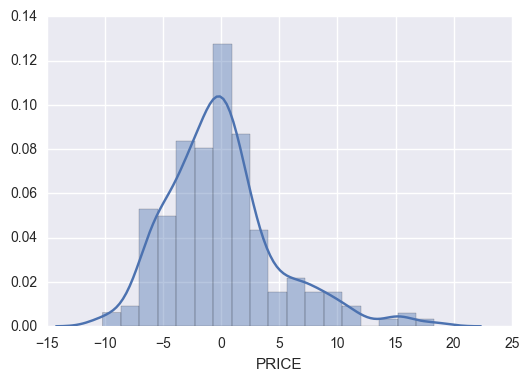

In [64]:
sns.distplot(y_test - predictions)

In [65]:
from sklearn import metrics

In [66]:
metrics.mean_absolute_error(y_test,predictions)

3.5003356169115132

In [67]:
metrics.mean_squared_error(y_test,predictions)

22.631612002764207

In [68]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

4.7572693851372563